In [5]:
import requests
from bs4 import BeautifulSoup
products=[]
for i in range (1, 21):
  html = requests.get("https://r-komplekt.ru/catalog/kofemashiny_traditsionnye/?PAGEN_1="+str(i)).content.decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
  products.extend(soup.find_all("div", class_="product-line"))
print(len(products))





600


In [6]:
!pip install dash
!pip install dash-bootstrap-components
!pip install dash_core_components






  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.9 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=e9ed17607cac2bc75202690aacf2d7b6c70d98a29b020dc6c7aeaf92e8558e8b
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 5.4 MB/s eta 0:00:00


In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import dash
from dash import dcc, html
import plotly.express as px


In [8]:
links=[]
for product in products:
  links.append("https://r-komplekt.ru" + product.find("a")["href"])


In [21]:

country=[]
brand=[]
price=[]
setting=[]
connection=[]
coffee=[]
boiler_volume=[]
grinder=[]
frother=[]
title=[]
i=1
list1=['Страна', 'Производитель','Установка', 'Подключение','Тип кофе', 'Объём бойлера, л', 'Встроенная кофемолка', 'Капучинатор' ]
for current_link in links:
  html = requests.get(current_link).content.decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
  if soup.find( class_="changeShortDescription") is not None:
    title.append(soup.find( class_="changeShortDescription"))
  else:
    title.append("--")
  if soup.find( class_="price changePrice") is not None:
    price.append(soup.find( class_="price changePrice"))
  else:
    price.append("--")
  tables=soup.find_all('table')
  correct_table=tables[0]
  headers = []
  items = []
  for header in correct_table.find_all('th'):
      headers.append(header.text.strip())
  for line in correct_table.find_all('tr'):
      cells = line.find_all('td')
      row = []
      for cell in cells:
        row.append(cell.text.strip())
      if row:
        items.append(row)
  df = pd.DataFrame(items)
  df=df.set_index(0)
  df=df.fillna("--")
  #df=df.drop(2, axis=1)
  for item in list1:
    if item not in df.index:
      new_values = {col: '—-' for col in df.columns}
      df.loc[item]=new_values
  country.append(df.loc['Страна', 1])
  brand.append(df.loc['Производитель', 1])
  setting.append(df.loc['Установка', 1])
  connection.append(df.loc['Подключение', 1])
  coffee.append(df.loc['Тип кофе', 1])
  boiler_volume.append(df.loc['Объём бойлера, л', 1])
  grinder.append(df.loc['Встроенная кофемолка', 1])
  frother.append(df.loc['Капучинатор', 1])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


KeyboardInterrupt: 

In [ ]:

country=[]
brand=[]
price=[]
setting=[]
connection=[]
coffee=[]
boiler_volume=[]
grinder=[]
frother=[]
title=[]
i=1
list1=['Страна', 'Производитель','Установка', 'Подключение','Тип кофе', 'Объём бойлера, л', 'Встроенная кофемолка', 'Капучинатор' ]
for current_link in links:
  print(i)
  html = requests.get(current_link).content.decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
  if soup.find( class_="changeShortDescription") is not None and soup.find( class_="price changePrice") is not None:
    title.append(soup.find( class_="changeShortDescription").get_text(strip=True))
    price.append(soup.find( class_="price changePrice").get_text(strip=True))
    tables=soup.find_all('table')
    correct_table=tables[0]
    headers = []
    items = []
    for header in correct_table.find_all('th'):
        headers.append(header.text.strip())
    for line in correct_table.find_all('tr'):
        cells = line.find_all('td')
        row = []
        for cell in cells:
          row.append(cell.text.strip())
        if row:
          items.append(row)
    df = pd.DataFrame(items)
    df=df.set_index(0)
    df=df.fillna("--")
    #df=df.drop(2, axis=1)
    for item in list1:
      if item not in df.index:
        new_values = {col: '—-' for col in df.columns}
        df.loc[item]=new_values
    country.append(df.loc['Страна', 1])
    brand.append(df.loc['Производитель', 1])
    setting.append(df.loc['Установка', 1])
    connection.append(df.loc['Подключение', 1])
    coffee.append(df.loc['Тип кофе', 1])
    boiler_volume.append(df.loc['Объём бойлера, л', 1])
    grinder.append(df.loc['Встроенная кофемолка', 1])
    frother.append(df.loc['Капучинатор', 1])

    i+=1
  else:
    pass


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
75
76
77
78
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
92
93
94
95
96
97
98
99
100
101
102
103
103
104
105
106
107
108
109
110
111
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [39]:

df=pd.DataFrame({"Название": title , "Цена": price, "Страна производства": country, "Бренд": brand, "Тип установки": setting, "Тип подключения": connection, "Тип кофе": coffee, "Объем бойлера, л": boiler_volume, "Кофемолка": grinder, "Капуччинатор": frother})

In [1]:
df

NameError: name 'df' is not defined

In [50]:
df['Цена'] = (df['Цена'].apply(lambda item: ''.join(filter(str.isdigit, item))))
df['Цена'] = pd.to_numeric(df['Цена'], errors='coerce')

In [51]:
df['Цена'].dtype

dtype('int64')

In [71]:
df

,Название,Цена,Страна производства,Бренд,Тип установки,Тип подключения,Тип кофе,"Объем бойлера, л",Кофемолка,Капуччинатор
0,Кофемашина рожковая MANIFESTA Professionale 2 ...,349490,Италия,MANIFESTA ...,Настольная,Электрическое,молотый,11.5,Нет,Есть
1,Кофемашина рожковая C.M.A. ASTORIA Pratic Avan...,480000,Италия,C.M.A. Astoria ...,Настольная,Электрическое,молотый,10.5,Нет,Есть
2,Кофемашина рожковая NUOVA SIMONELLI Appia Life...,352314,Италия,Nuova Simonelli ...,Настольная,Электрическое,молотый,11,Нет,Есть
3,Кофемашина рожковая QUALITY ESPRESSO FUTURMAT ...,216786,Испания,QUALITY ESPRESSO FUTURMAT ...,Настольная,Электрическое,молотый,5,Нет,Есть
4,Кофемашина рожковая ESTREMO Djua 2 высокие гру...,239250,Китай,ESTREMO ...,Настольная,Электрическое,молотый,11,Нет,Есть
...,...,...,...,...,...,...,...,...,...,...
582,Кофемашина рожковая CREM Diamant Pro 3B 2 высо...,1202000,Испания,CREM ...,Настольная,Электрическое,молотый,14.5,Нет,Есть
583,Кофемашина рожковая CREM EX3 Display 3 высокие...,571200,Испания,CREM ...,Настольная,Электрическое,молотый,17.5,Нет,Есть
584,Кофемашина рожковая CARIMALI Diva Pro DIV-E3-H...,1013114,Италия,CARIMALI ...,Настольная,Электрическое,молотый,16,Нет,Есть
585,Кофемашина рожковая LA PAVONI DIA3SV 2 низкие ...,757285,Швейцария,LA PAVONI ...,Настольная,Электрическое,молотый,22.5,Нет,Есть


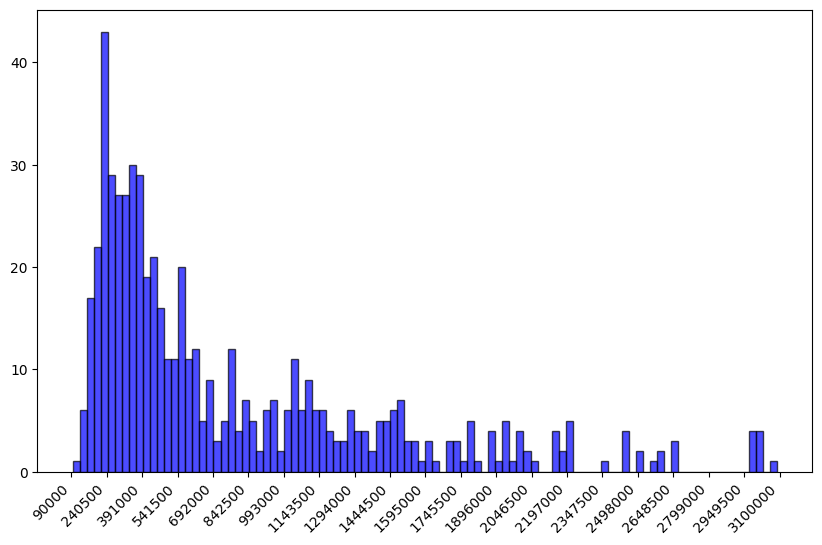

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df['Цена'], bins=100, color='blue', alpha=0.7, edgecolor='black')
ticks = np.linspace(90000, 3100000, 21)
plt.xticks(ticks)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45, ha='right')

plt.show()